# Primeira exploracao dos dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Sequencias de treino

In [3]:
train_seqs = pd.read_csv("train_sequences.csv")
train_seqs

,target_id,sequence,temporal_cutoff,description,all_sequences
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA..."
...,...,...,...,...,...
839,8T3E_EC,AAACUCCAUGUAUUGGUUACCCAUCUGCAUCGAAAACUCUCCGAAC...,2024-12-11,Hypomethylated yeast 80S bound with Taura synd...,>8T3E_1|Chain A[auth BA]|40S ribosomal protein...
840,8T3F_EC,AAACUCCAUGUAUUGGUUACCCAUCUGCAUCGAAAACUCUCCGAAC...,2024-12-11,Hypomethylated yeast 80S bound with Taura synd...,>8T3F_1|Chain A[auth BA]|40S ribosomal protein...
841,8XCC_B,GUGCUGCUGUCUCCCAGACGGGAGGCAGAACUGCACCUUCCAUCAG...,2024-12-11,"Cryo-EM structure of Cas12j19 (E100K), crRNA a...",>8XCC_1|Chain A|Cas12j19(E100K)|unclassified s...
842,8Z1G_T,GGUAAAAUGGCUGAGUGAAGCAUUGGACUGUAAAUCUAAAGACAGG...,2024-12-18,Cryo-EM structure of human ELAC2-pre-tRNA,>8Z1G_1|Chain A[auth T]|Homo sapiens mitochond...


## Primeiro tratamento das sequencias de treino

In [4]:
train_seqs_new = train_seqs.copy()

train_seqs_new["resname"] = train_seqs_new["sequence"].apply(lambda x: list(x))
train_seqs_new = train_seqs_new[["target_id", "sequence", "resname"]].explode("resname", ignore_index=True)
train_seqs_new["resid"] = train_seqs_new.groupby("target_id").cumcount() + 1
train_seqs_new["target_id"] = train_seqs_new["target_id"] + "_" + train_seqs_new["resid"].astype(str)
train_seqs_new

,target_id,sequence,resname,resid
0,1SCL_A_1,GGGUGCUCAGUACGAGAGGAACCGCACCC,G,1
1,1SCL_A_2,GGGUGCUCAGUACGAGAGGAACCGCACCC,G,2
2,1SCL_A_3,GGGUGCUCAGUACGAGAGGAACCGCACCC,G,3
3,1SCL_A_4,GGGUGCUCAGUACGAGAGGAACCGCACCC,U,4
4,1SCL_A_5,GGGUGCUCAGUACGAGAGGAACCGCACCC,G,5
...,...,...,...,...
137090,8Z1F_T_82,GGUAAAAUGGCUGAGUGAAGCAUUGGACUGUAAAUCUAAAGACAGG...,U,82
137091,8Z1F_T_83,GGUAAAAUGGCUGAGUGAAGCAUUGGACUGUAAAUCUAAAGACAGG...,C,83
137092,8Z1F_T_84,GGUAAAAUGGCUGAGUGAAGCAUUGGACUGUAAAUCUAAAGACAGG...,A,84
137093,8Z1F_T_85,GGUAAAAUGGCUGAGUGAAGCAUUGGACUGUAAAUCUAAAGACAGG...,U,85


## Labels de treino

In [5]:
train_labels = pd.read_csv("train_labels.csv")
train_labels

,ID,resname,resid,x_1,y_1,z_1
0,1SCL_A_1,G,1,13.760,-25.974001,0.102
1,1SCL_A_2,G,2,9.310,-29.638000,2.669
2,1SCL_A_3,G,3,5.529,-27.813000,5.878
3,1SCL_A_4,U,4,2.678,-24.900999,9.793
4,1SCL_A_5,G,5,1.827,-20.136000,11.793
...,...,...,...,...,...,...
137090,8Z1F_T_82,U,82,NaN,NaN,NaN
137091,8Z1F_T_83,C,83,NaN,NaN,NaN
137092,8Z1F_T_84,A,84,NaN,NaN,NaN
137093,8Z1F_T_85,U,85,NaN,NaN,NaN


## Dados de treino totais

In [6]:
pd.merge(train_seqs_new[["target_id", "sequence"]], train_labels, left_on="target_id", right_on="ID").drop("target_id", axis=1)

,sequence,ID,resname,resid,x_1,y_1,z_1
0,GGGUGCUCAGUACGAGAGGAACCGCACCC,1SCL_A_1,G,1,13.760,-25.974001,0.102
1,GGGUGCUCAGUACGAGAGGAACCGCACCC,1SCL_A_2,G,2,9.310,-29.638000,2.669
2,GGGUGCUCAGUACGAGAGGAACCGCACCC,1SCL_A_3,G,3,5.529,-27.813000,5.878
3,GGGUGCUCAGUACGAGAGGAACCGCACCC,1SCL_A_4,U,4,2.678,-24.900999,9.793
4,GGGUGCUCAGUACGAGAGGAACCGCACCC,1SCL_A_5,G,5,1.827,-20.136000,11.793
...,...,...,...,...,...,...,...
137090,GGUAAAAUGGCUGAGUGAAGCAUUGGACUGUAAAUCUAAAGACAGG...,8Z1F_T_82,U,82,NaN,NaN,NaN
137091,GGUAAAAUGGCUGAGUGAAGCAUUGGACUGUAAAUCUAAAGACAGG...,8Z1F_T_83,C,83,NaN,NaN,NaN
137092,GGUAAAAUGGCUGAGUGAAGCAUUGGACUGUAAAUCUAAAGACAGG...,8Z1F_T_84,A,84,NaN,NaN,NaN
137093,GGUAAAAUGGCUGAGUGAAGCAUUGGACUGUAAAUCUAAAGACAGG...,8Z1F_T_85,U,85,NaN,NaN,NaN


## Visualizacao de uma molecula

In [7]:
plot_data = train_labels[train_labels["ID"].str.contains("1SCL_A")]

In [8]:
# px.scatter_3d(plot_data, "x_1", "y_1", "z_1")
px.line_3d(plot_data, "x_1", "y_1", "z_1", markers="o",hover_data=["resname", "resid"])

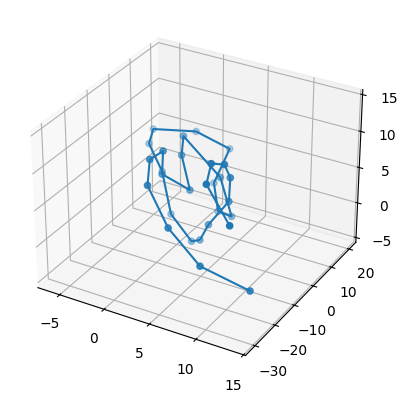

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(plot_data["x_1"], plot_data["y_1"], plot_data["z_1"])
ax.plot(plot_data["x_1"], plot_data["y_1"], plot_data["z_1"])
plt.show()